**Вежба за Глава 2 - Конволуциски невронски мрежи невронски мрежи (Креирање на модел за класификација на слики)**


1.   Да се вклучат библиотеките потребни за работа со CNN. 
2.   Да се исчита податочното множество CIFAR10
3.   Да се испечатат големините на податоците (слики и ознаки) за тренирање и тестирање.
4.  Да се прикажат 25 случајни слики од податочното множество 
5. Да се креира модел со следните слоеви
*   Конволуциски со 32 филтри со големина 3х3 и relu активација
*   Здружување MaxPooling со големина 2х2
*   Конволуциски со 64 филтри со големина 3х3 и relu активација
*   Здружување MaxPooling со големина 2х2
*   Конволуциски со 64 филтри со големина 3х3 и relu активација
*   Израмнување
*   Скрен слој со 96 јазли и relu активација
*   Излезен слој со 10 јазли и softmax активација
6. Да се прикаже преглед на моделот
7. Да се истренира мрежата користејќи adam метод за оптимизација на накрсна категорична ентропија како функцијата на загуба. Тренирањето да се одвива во 10 епохи.
8. Да се прикажат графички функциите на загуба и прецизноста во текот на тренирањето.



Вклучување на библиотеки потребни за работа со CNN

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

Читање на податочното множество CIFAR10

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()



Печатење на бројот на уникатни ознаки со кои се класифицираат сликите од податочното множество и печатење на најмалата и најголемата вредност на првата слика. Овие вредности ќе се користат за да се нормализира сликата во опсегот [0,1]

In [138]:
values = np.unique(train_labels)
print(values.shape)
print("min, max =", min(train_images[0].flatten()),",",max(train_images[0].flatten()))

(10,)
min, max = 0 ,  255


Печатење на големината на сликите и ознаките за тренирање и сликите и ознаките за тестирање

In [9]:

print("Слики за тренирање:",train_images.shape)
print("Ознаки за тренирање:",train_labels.shape)
print("Слики за тестирање:",test_images.shape)
print("Ознаки за тестирање:",test_labels.shape)

Слики за тренирање: (50000, 32, 32, 3)
Ознаки за тренирање: (50000, 1)
Слики за тестирање: (10000, 32, 32, 3)
Ознаки за тестирање: (10000, 1)


Приказ на 25 случајни слики од податочното множество 

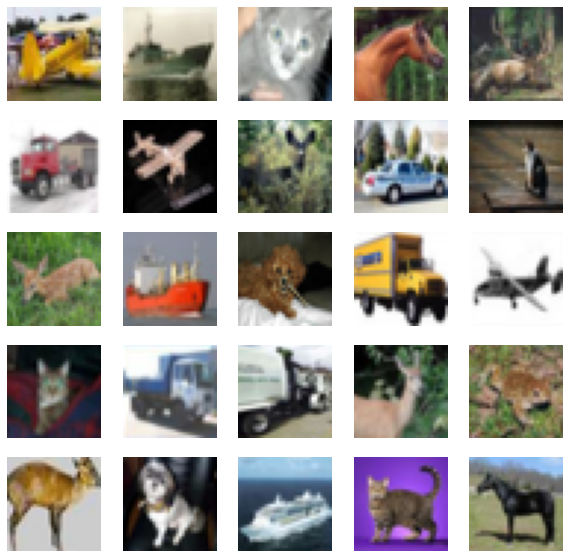

In [4]:

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)  
    plt.axis("off")
    plt.grid(False)
    # се генерира случаен цел број од 0 до бројот на слики во податочното множество
    plt.imshow(train_images[np.random.randint(test_images.shape[0])]) 
plt.show()

Приказ на 25 случајни слики во матрица 5х5

## Градење на модел со додавање на слоеви

Најпрво се креира празен секвенцијален модел во кој ќе се додаваат слоеви. За да може да се повика методот summary(), потребно е првиот слој да го дефинира обликот на влезот кој потоа се користи за пресметка на бројот на параметри на секој нареден слој.  Еден од начините да се постигне тоа е кај првиот слој како аргумент да се наведе input_shape, но бидејќи ќе се користат слоеви за нормализација и збогатување на податочното множество, како прв слој на празниот модел може да се доаде InputLayer во кој се наведува обликот на влезните слики. Бидејќи станува збор за слики во боја со големина 32х32, длабочината на влезот е 3, па затоа влезниот облике е (32,32,3).



In [40]:
model = models.Sequential()
model.add(layers.InputLayer(input_shape=(32,32,3)))



Нормализирање на вредностите на влезните податоци од оспегот [0, 255] во опсегот [0,1]

In [41]:
model.add(layers.Rescaling(1./255))


Се додаваат следните слоеви:

*   Конволуциски со 32 филтри со големина 3х3 и relu активација
*   Здружување MaxPooling со големина 2х2
*   Конволуциски со 64 филтри со големина 3х3 и relu активација
*   Здружување MaxPooling со големина 2х2
*   Конволуциски со 64 филтри со големина 3х3 и relu активација



In [42]:
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add( layers.MaxPooling2D((2, 2)))
model.add( layers.Conv2D(64, (3, 3), activation='relu'))
model.add( layers.MaxPooling2D((2, 2)))
model.add( layers.Conv2D(64, (3, 3), activation='relu'))



Се додаваат излезни слоеви слоеви:

*   Слој за израмнување
*   Скриен слој со 96 јазли relu активација
*   Последен излезен слој со 10 јазли (колку што има различни класи)




In [43]:
model.add(layers.Flatten())
model.add(layers.Dense(96, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


Се печати преглед на целиот модел

In [44]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_7 (Rescaling)      (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_6 (Flatten)          (None, 1024)            

Се компајлира моделот така што ќе користи adam метод за оптимизација на накрсна категорична ентропија како функцијата на загуба. Како метрика за перформанските на моделот се користи прецизноста. Потоа се започнува со тренирање на мрежата во 10 епохи користејќи го податочното множество.

In [45]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 [==============================] - 73s 46ms/step - loss: 1.5358 - accuracy: 0.4421 - val_loss: 1.2538 - val_accuracy: 0.5536
Epoch 2/10
1563/1563 [==============================] - 73s 47ms/step - loss: 1.1840 - accuracy: 0.5812 - val_loss: 1.1053 - val_accuracy: 0.6052
Epoch 3/10
1563/1563 [==============================] - 74s 47ms/step - loss: 1.0347 - accuracy: 0.6374 - val_loss: 0.9818 - val_accuracy: 0.6517
Epoch 4/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.9320 - accuracy: 0.6737 - val_loss: 0.9890 - val_accuracy: 0.6559
Epoch 5/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.8604 - accuracy: 0.6973 - val_loss: 0.9323 - val_accuracy: 0.6771
Epoch 6/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.7979 - accuracy: 0.7207 - val_loss: 0.8692 - val_accuracy: 0.6959
Epoch 7/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.7579 - accuracy: 0.7340 - val_loss: 0.8955 -

Приказ на вредностие на прецизноста и загубата во текот на епохите добиени од тренинг множеството и од валидациското множество.

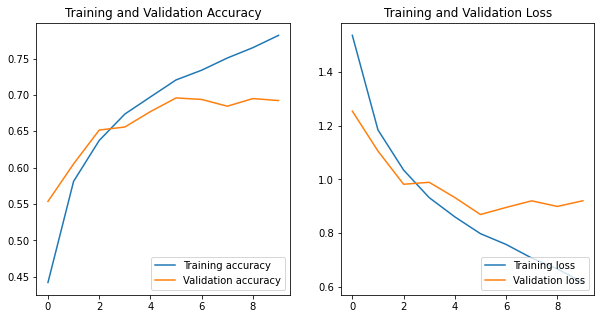

313/313 - 4s - loss: 0.9204 - accuracy: 0.6923


In [46]:

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label = 'Validation loss')
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')

plt.show()



test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

Според добиените графици може да се заклучи дека моделот е пренагоден на податочното множество бидејќи прецизноста при тренирањето постојано се подобрува за разлика од валидациската прецизност која во даден момент се сече со кривата на прецизноста при тренирање и престанува да бележи тредн на подобрување. 

# Подобрување на модел за класификација


Да се направи обид да се подобри моделот преку следните чекори 
1. Да се додаде слој за збогатување на податоците кој ќе прави хоризонтално превртување, ротација (фактор 0.1) и рамномерно зголемување по двете оски (фактор 0.1) 
2.  Да се прикажат 25 случајни слики од податочното множество на кои ќе бидат применети трансформациите од слојот за зботаување
2. Да се постави padding = 'SAME' кај конволуциските слоеви
3. Да се додаде Dropout (фактор 0.2) кај последниот скреин слој 
креира празен слој и во него да се додадат следните слоеви:
4. Да се прикаже преглед на моделот
5. Да се истренира мрежата користејќи adam метод за оптимизација на накрсна категорична ентропија како функцијата на загуба. Тренирањето да се одвива во 15 епохи.
8. Да се прикажат графички функциите на загуба и прецизноста во текот на тренирањето.

Додавање на слој за збогатување на податочното множество и додавање на Dropout на излезните слоеви.

Креирање на слој кој ќе прави збогатување на податочното множество и тоа:
*   Хоризонтално превертување
*   Ротација во опсетот [-0.1pi, 0.1pi]
*   Случајно зголемување до 10% по двете оски




In [4]:
data_augmentation = models.Sequential(
  [
   layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
   layers.RandomZoom(0.1)
  ]
)

Приказ на 25 случајни слики на кои се применува слојот за трансформација на оригиналните слики

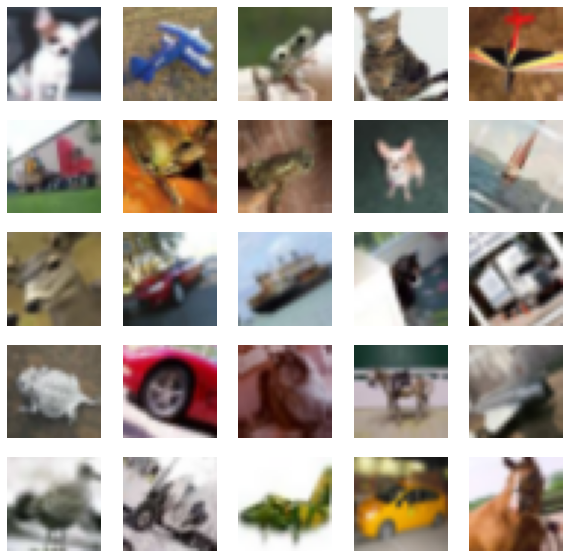

In [48]:

augmented_images = data_augmentation(train_images[np.random.randint(test_images.shape[0], size=25)])
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)  
    plt.imshow(augmented_images[i]) 
    plt.axis("off")
plt.show()

Се креира истиот модел како и претходно, но се додава слојот data_augmentation, се поставува padding='SAME' (се зголемува бројот на параметри за оптимизација) и се додава слој Dropout.

In [31]:
model_reg = models.Sequential()
model_reg.add(layers.InputLayer(input_shape=(32,32,3)))
model_reg.add(layers.Rescaling(1./255))
model_reg.add(data_augmentation)
model_reg.add(layers.Conv2D(32, (3, 3), padding='SAME', activation='relu'))
model_reg.add( layers.MaxPooling2D((2, 2)))
model_reg.add( layers.Conv2D(64, (3, 3),  padding='SAME',  activation='relu'))
model_reg.add( layers.MaxPooling2D((2, 2)))
model_reg.add( layers.Conv2D(128, (3, 3), padding='SAME', activation='relu'))
model_reg.add( layers.MaxPooling2D((2, 2)))

model_reg.add(layers.Flatten())
model_reg.add(layers.Dense(96, activation='relu'))
model_reg.add(layers.Dropout(0.2))
model_reg.add(layers.Dense(10, activation='softmax'))


In [32]:
model_reg.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_11 (Rescaling)     (None, 32, 32, 3)         0         
_________________________________________________________________
sequential (Sequential)      (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 8, 8, 128)       

Новиот модели има речиси двојно повеќе параметри за оптимизација.

Моделот се тренира на ист начин како и претходно, но се користата 15 епохи.

In [33]:
model_reg.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_reg = model_reg.fit(train_images, train_labels, epochs=15, validation_data=(test_images, test_labels))

Epoch 1/15
1563/1563 [==============================] - 137s 87ms/step - loss: 1.6411 - accuracy: 0.4026 - val_loss: 1.4715 - val_accuracy: 0.4824
Epoch 2/15
1563/1563 [==============================] - 137s 87ms/step - loss: 1.3333 - accuracy: 0.5226 - val_loss: 1.1442 - val_accuracy: 0.6009
Epoch 3/15
1563/1563 [==============================] - 137s 87ms/step - loss: 1.2109 - accuracy: 0.5689 - val_loss: 1.0885 - val_accuracy: 0.6206
Epoch 4/15
1563/1563 [==============================] - 137s 88ms/step - loss: 1.1318 - accuracy: 0.5993 - val_loss: 1.0487 - val_accuracy: 0.6357
Epoch 5/15
1563/1563 [==============================] - 137s 88ms/step - loss: 1.0789 - accuracy: 0.6202 - val_loss: 0.9556 - val_accuracy: 0.6659
Epoch 6/15
1563/1563 [==============================] - 138s 89ms/step - loss: 1.0407 - accuracy: 0.6351 - val_loss: 0.9493 - val_accuracy: 0.6679
Epoch 7/15
1563/1563 [==============================] - 138s 88ms/step - loss: 1.0088 - accuracy: 0.6470 - val_loss: 0

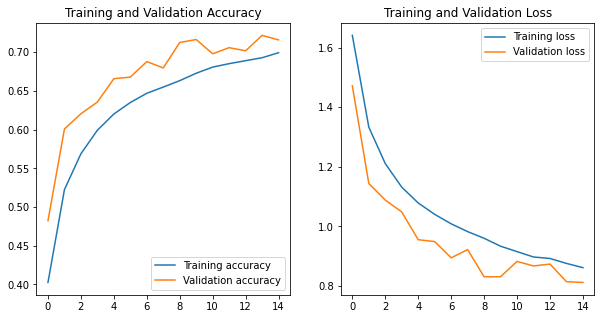

In [34]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history_reg.history['accuracy'], label='Training accuracy')
plt.plot(history_reg.history['val_accuracy'], label = 'Validation accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history_reg.history['loss'], label='Training loss')
plt.plot(history_reg.history['val_loss'], label = 'Validation loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()


Од добиените резултати се гледа дека моделот има поголема прецизност од претходни и дека доколку бројот на епохи се зголеми, може да се очекува уште поголема прецизност бидејќи и во последните чекори прецизноста сеуште бележи тренд на подобрување. Дополнително, валидациската прецизност е повисока во однос на прецизноста при тренирањето.

# Дополнителни задачи

Креијрате нови модели врз основа на дадените така што ќе направите некоја од следните промени:
* бројот на филтри
* димензија на филтри
* димензија на поместување
* нови слоеви
* различни активациски функции